## Team Member :
### Hammam Abdelwahab
### Najlae Lemrabet
### Hatim Jamali

# Homework4: Instructions

1) Write down 3 questions and their brief answers on the reading material. [2 Points]

#### 1-what is a VC Dimension?
The VC dimension is a purely combinatorial concept that has no connection with the geometric of dimention.

#### 2-how proceed the method of structural risk minimization?
* the empirical risk (training error) for each pattern classifier is minimized
* the pattern classifier F* with the smallest guaranteed risk is identified

#### 3-what are different Learning Tasks?
   * Pattern Association
   * Pattern Recognition
   * Function Approximation
   * Control
   * Filtering
   * Beamforming

2) Read the rest of chapter 2 from Haykin’s book (2nd edition). Summarize or sketch your insights in mind-map or an outline or a summary. [4 Points]

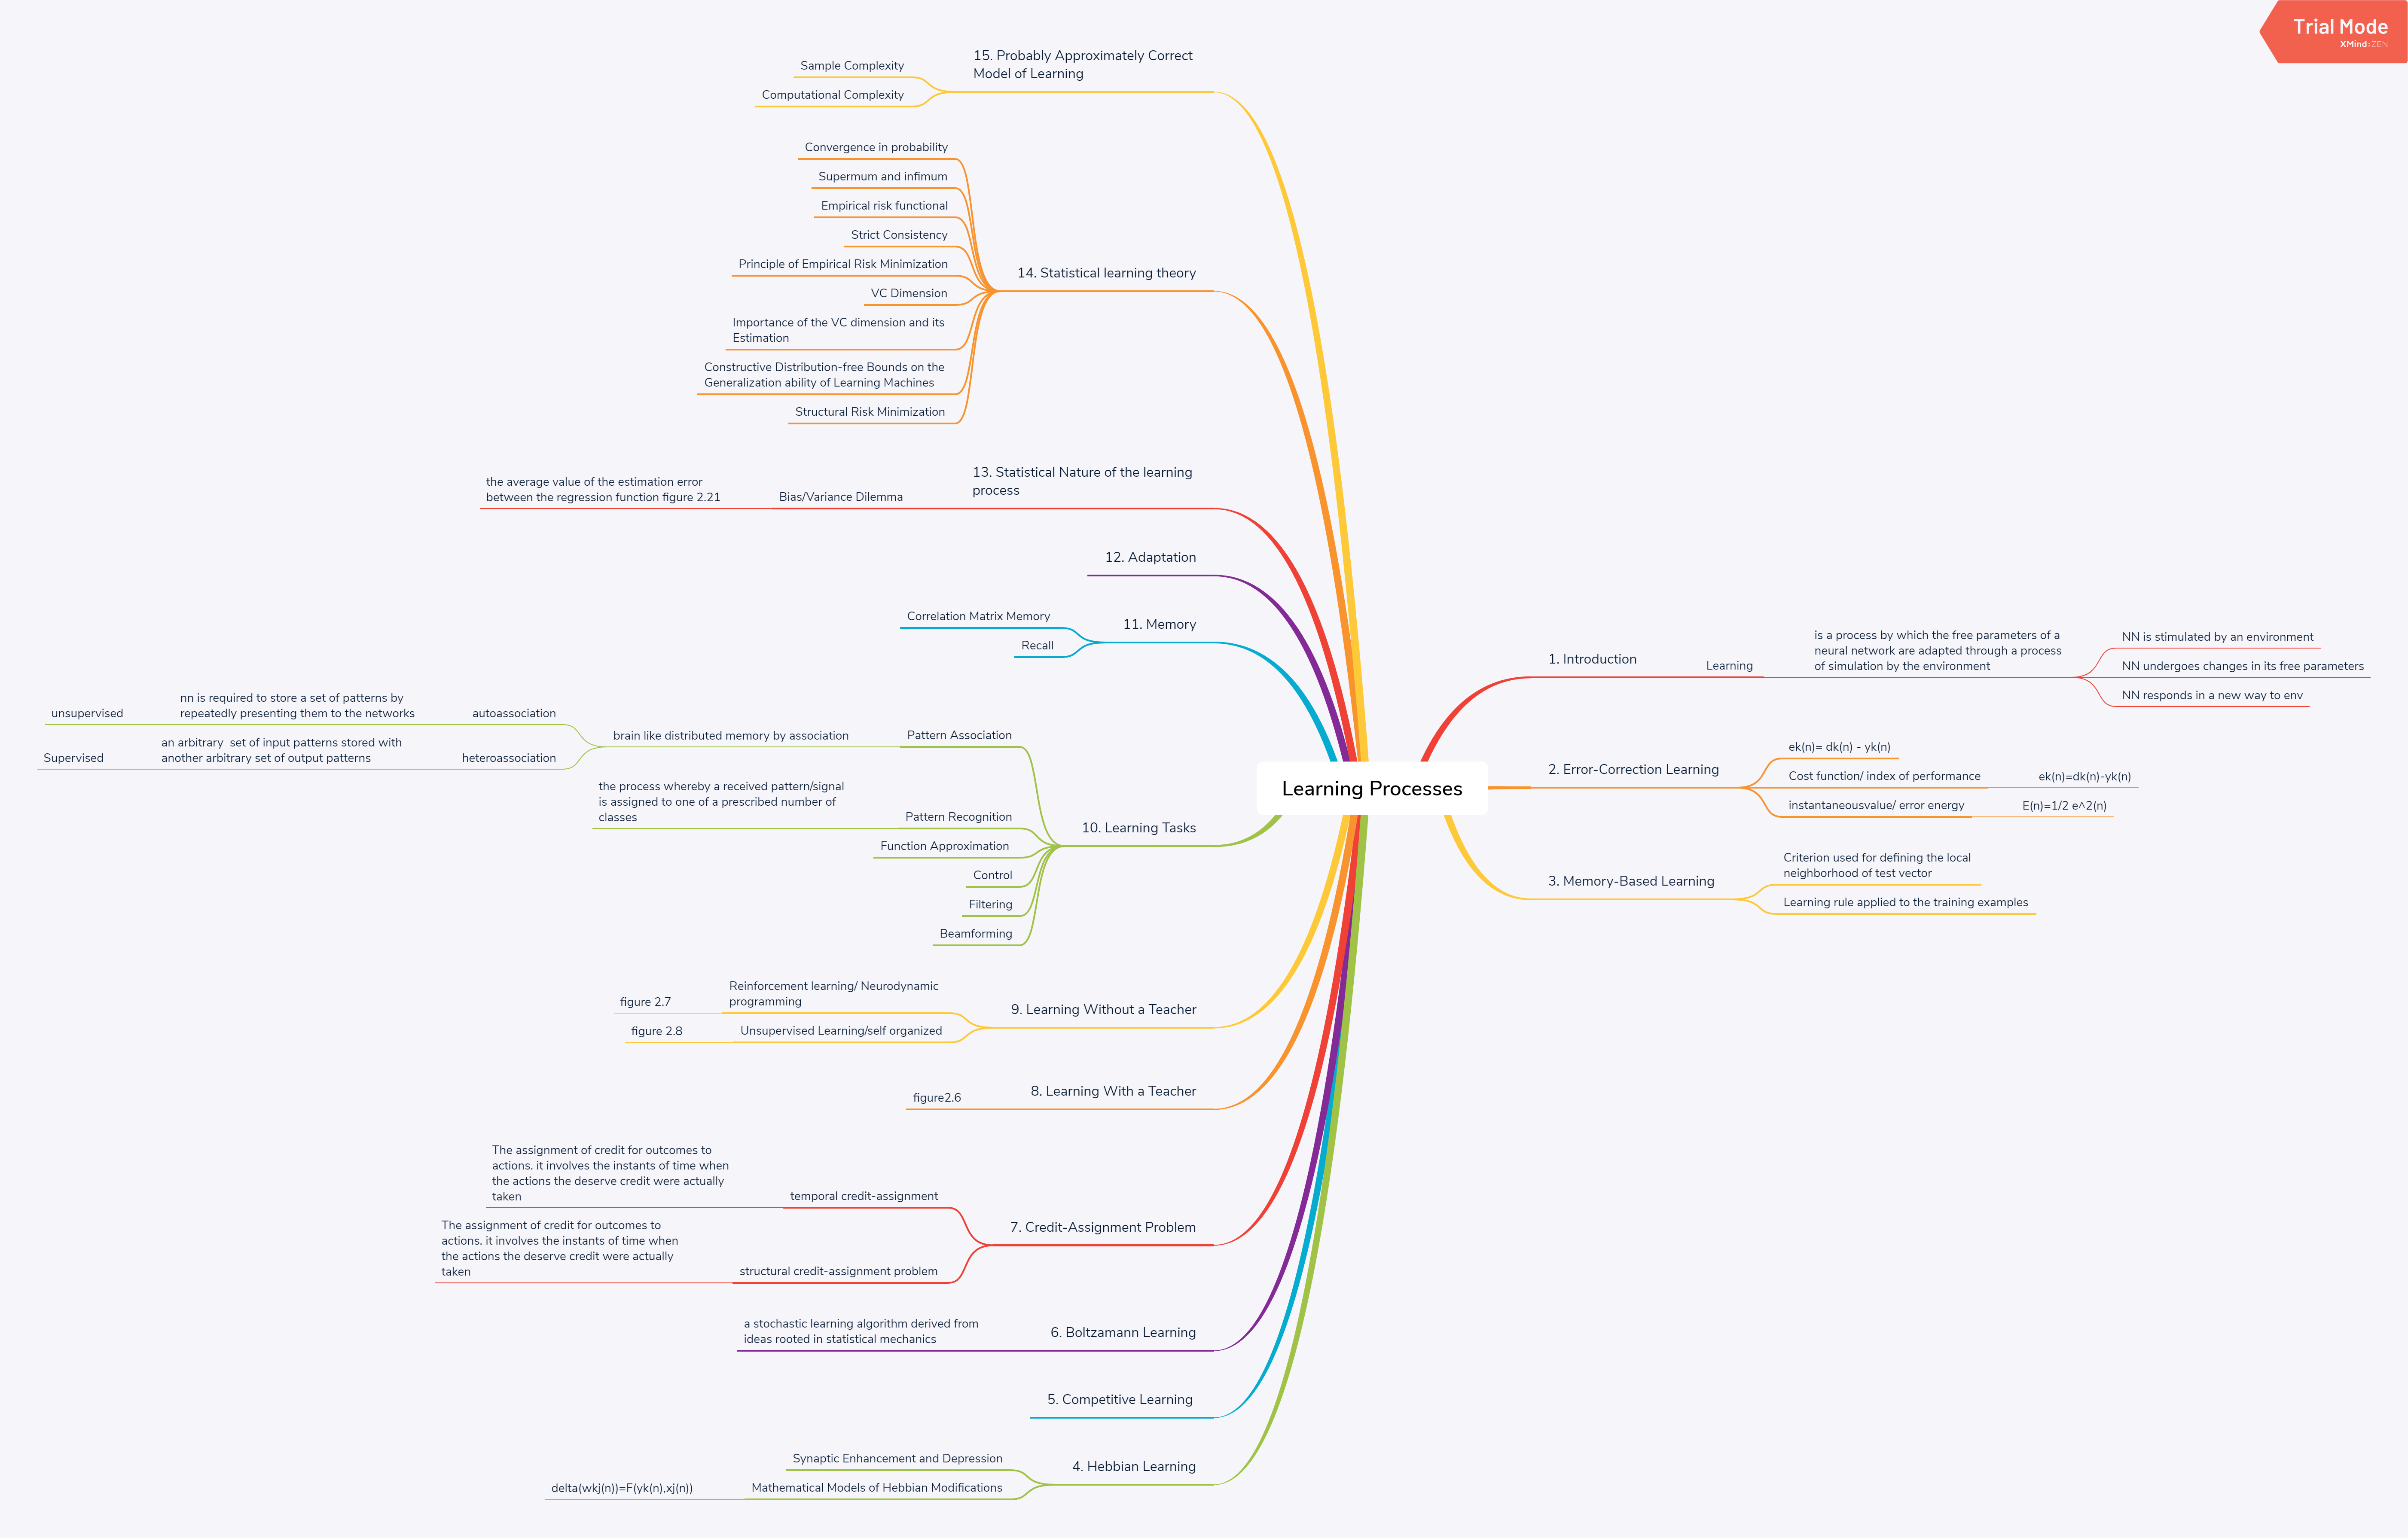

In [21]:
from IPython.display import Image
Image(filename='LearningProcesses.png')

3) Definition: consistent learner

• A learner is consistent if it outputs hypotheses that perfectly fit the training data, whenever possible. It is quite reasonable to ask that a learning algorithm be consistent, given that we typically prefer a hypothesis that fits the training data over one that does not.

Task:

• Write a consistent learner for Hr from last Exercise (i.e. Hr = {((a < x < b)⋀(c < y < d)) | a, b,c, d ∈ IR } ). Generate a variety of target concept rectangles at random, corresponding to different rectangles in the plane. Generate random examples of each of these target concepts, based on a uniform distribution of instances within the rectangle from (0,0) to (100, 100).

Plot the generalization error as a function of the number of training examples, m. On the same graph, plot the theoretical relationship between e and m, for d = .95. Does theory fit experiment?

Note: the consistent learner is not NN.
[8 Points]

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
import random

Generalization error of hypothesis =  (7.927699381639449e-05)
Generalization error of test = (0.06347444638232652)


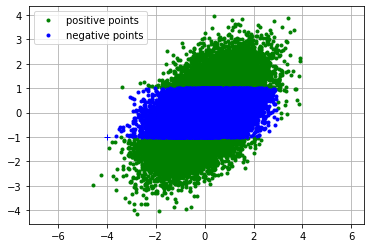

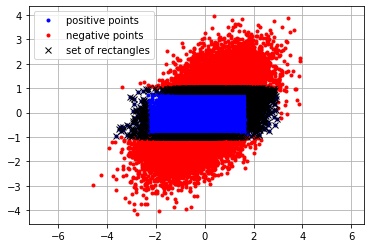

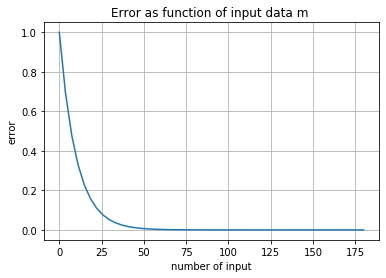

No handles with labels found to put in legend.


for m= 250 generalization_error = 0.016
for m= 500 generalization_error = 0.0
for m= 1000 generalization_error = 0.005
for m= 1250 generalization_error = 0.0032
for m= 1500 generalization_error = 0.0026666666666666666


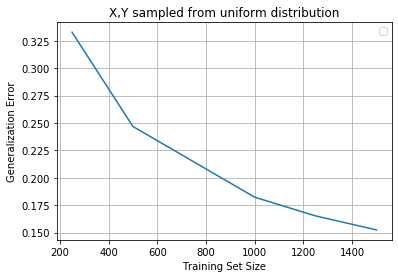

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
import random

class Rect:
    """
    To create a rectangle concept.
    """
    def __init__(self,x_max,x_min,y_max,y_min):
        self.x_max = x_max
        self.x_min = x_min
        self.y_max = y_max
        self.y_min = y_min
        
        
        
    def inside_rectangle(self,point):
        """
        This is classify if the points are inside this rectangle or not.
        Returns a numpy array of labels with True or False values. 
        """
        return np.array((point[:,0] >= self.x_min) & (point[:,0] <= self.x_max) \
                        & (point[:,1] >= self.y_min) & (point[:,1] <= self.y_max))
    

    
def is_rectangle_qualified(labels,eps):
    if np.mean(labels) >= 3*eps:
        return 1 
    else: 
        return 0
    
# def generate_examples_uniformly(N,mean=[0,0],cov=cov):
    
#     return np.random.multivariate_normal(mean=mean, cov=cov, size=N)
    

def generalization_error(points,target_rect,hypoth_rect): 
    """
    Calculate the generalization error between the target rectangle 
    and the hypothesis rectangle. The error will be used later to reject or accept
    the hypothesis. 
    """
    labels_actual = target_rect.inside_rectangle(points)
    labels_hypoth = hypoth_rect.inside_rectangle(points)
    
    error = labels_actual != labels_hypoth
    error = np.mean(error)
    return error
def generate_target_rectangle(X, eps):
    """ Generates the target concepts which should
        be the tightest rectangle that include all points
        from one class"""

    while True:
        # Generate corner points of rectangle
        min_x = np.min(X[:,0])
        min_y = np.min(X[:,1])
        mid_x = np.median(X[:,0])
        mid_y = np.median(X[:,1])
        max_x = np.max(X[:,0])
        max_y = np.max(X[:,1])

        rect_min_x = random.randrange(int(min_x), int(mid_x))
        rect_min_y = random.randrange(int(min_y), int(mid_y))
        rect_max_x = random.randrange(int(mid_x), int(max_x))
        rect_max_y = random.randrange(int(mid_y), int(max_y))

        # Generate unknown target concept
        R_target = Rect(x_min=rect_min_x,
                             y_min=rect_min_y,
                             x_max=rect_max_x,
                             y_max=rect_max_y)

        # Estimate probability of unknown target concept with empirical probability
        # Size of data from normal distribution must be ceil((1.8595/eps)**2)
        p_hat = is_rectangle_qualified(R_target.inside_rectangle(X),eps)

       # if p_hat >= 3*eps:
            #print('[*] Requirement P(c) >= {} is qualified. p_hat ({}) >= {}'.format(2*eps, p_hat, round(3*eps, 2)))
            #print('[*] Successfully generate concept.')
        return R_target
        #else:
            #print('[!] Requirement P(c) >= {} is not qualified. p_hat ({}) < {}'.format(2*eps, p_hat, round(3*eps, 2)))
            #print('[!] Re-generate concept...')
            #pass
            
            

def generate_target_rectangle(X, eps):
    """ Generate unknown target concept that p_hat(c) >= 3*eps """

    while True:
        # Generate corner points of rectangle
        min_x = np.min(X[:,0])
        min_y = np.min(X[:,1])
        mid_x = np.median(X[:,0])
        mid_y = np.median(X[:,1])
        max_x = np.max(X[:,0])
        max_y = np.max(X[:,1])

        rect_min_x = random.randrange(int(min_x), int(mid_x))
        rect_min_y = random.randrange(int(min_y), int(mid_y))
        rect_max_x = random.randrange(int(mid_x), int(max_x))
        rect_max_y = random.randrange(int(mid_y), int(max_y))

        # Generate unknown target concept
        R_target = Rect(x_min=rect_min_x,
                             y_min=rect_min_y,
                             x_max=rect_max_x,
                             y_max=rect_max_y)

        # Estimate probability of unknown target concept with empirical probability
        # Size of data from normal distribution must be ceil((1.8595/eps)**2)
        p_hat = is_rectangle_qualified(R_target.inside_rectangle(X),eps)

       # if p_hat >= 3*eps:
            #print('[*] Requirement P(c) >= {} is qualified. p_hat ({}) >= {}'.format(2*eps, p_hat, round(3*eps, 2)))
            #print('[*] Successfully generate concept.')
        return R_target
        #else:
            #print('[!] Requirement P(c) >= {} is not qualified. p_hat ({}) < {}'.format(2*eps, p_hat, round(3*eps, 2)))
            #print('[!] Re-generate concept...')
         #   pass
        
def generate_hypothesis_rectangle(X, R_target):
    """ Algorithm for generating a good hypothesis from hypothesis set.
        In our case, the hypothesis set is same as the concept class,
        that is, all the possible rectangles in 2-D plane.
        Our goal is to learn a good rectangle that is approximate to our target unknown rectangle.
        Thus, our strategy is to select the "tightest" rectangle containing the points in our target unknown rectangle.
    """

    # Classify points
    labels = R_target.inside_rectangle(X)
    #print(labels)
    # Select the tightest corner points in unknown target rectangle
    tight_rect_min_x = np.min(X[labels == 1, 0])
    tight_rect_min_y = np.min(X[labels == 1, 1])
    tight_rect_max_x = np.max(X[labels == 1, 0])
    tight_rect_max_y = np.max(X[labels == 1, 1])
    #print(tight_rect_min_x)
    # Generate our good hypothesis
    R_hypothesis = Rect(x_min=tight_rect_min_x,
                             y_min=tight_rect_min_y,
                             x_max=tight_rect_max_x,
                             y_max=tight_rect_max_y)

    return R_hypothesis

def calc_pac(m_,delta):
    """
    relationship between number or input data and error given delta
    """
    return np.sqrt((4.0 * (np.log(2*m/4)+1)-np.log(delta/4))/m)
# now we start by generating the uniformly distributed points 
# epsilon = 0.1 
# maximum number of data points is set to be m = (4/e)*log(4/d)

e = 0.1
d = 1-0.95
m = int(math.ceil((19.453/e)**2))
#m = int((4/e)*np.log(4/d))
mean = np.array([0,0])
cov = np.array([[1,0.5],[0.5,1]])

#generate_uniformly_random_examples for creating the target rectangle
points = np.random.multivariate_normal(mean=mean, cov=cov, size=m)

#generate the target rectangle  
target_rectangle = generate_target_rectangle(points,e)




#generate random numbers for creating the hypthesis rectangle 
x_m = np.random.multivariate_normal(mean=[0,0],cov=cov,size=m)

#generate hypothesis rectangle 
hypoth_rectangle = generate_hypothesis_rectangle(x_m,target_rectangle)


#estimate_generalization_error
X_M = np.random.multivariate_normal(mean=[0,0],cov=cov,size=m)

generalization_error = generalization_error(X_M, target_rectangle, hypoth_rectangle)

print('Generalization error of hypothesis =  ({})'.format(generalization_error))

            
# Now Generate our good hypothesis 
mean = np.array([0,0])
cov = np.array([[1,0.5],[0.5,1]])
e = 0.1 
d = 0.95
m = int(math.ceil((4/e) * math.log(4/d)))
#m = int((4/e)*np.log(4/d))
X_m = np.random.multivariate_normal(mean=mean, cov=cov, size=m)
hypoth_rectangle = generate_hypothesis_rectangle(X_m, target_rectangle)

# Estimate generalization error of hypothesis
M = int(math.ceil((19.453/e)**2))
#M = int((4/e)*np.log(4/d))
X_M = np.random.multivariate_normal(mean=mean, cov=cov, size=M)

# Generate test actual labels
label_true = target_rectangle.inside_rectangle(X_M)
# test
label_pred = hypoth_rectangle.inside_rectangle(X_M)
# find error 
label_error = (label_true != label_pred)
# Calculate generalization error
generalization_error = np.mean(label_error)

print( 'Generalization error of test = ({})'.format(generalization_error))


plt.plot([target_rectangle.x_min, target_rectangle.x_max], [target_rectangle.y_min, target_rectangle.y_max] , '+', c='b')
plt.plot(X_M[label_true == 0, 0], X_M[label_true == 0, 1], '.', c='g',label='positive points')
plt.plot(X_M[label_true == 1, 0], X_M[label_true == 1, 1], '.', c='b',label = 'negative points')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

plt.plot(X_M[label_true == 1, 0], X_M[label_true == 1, 1], '.', c='b',label='positive points')
plt.plot(X_M[label_true == 0, 0], X_M[label_true == 0, 1], '.', c='r',label = 'negative points')
plt.plot(X_M[label_error == 1, 0], X_M[label_error == 1, 1], 'x', c='black',label = 'set of rectangles')
plt.axis('equal')

plt.grid()
plt.legend()
plt.show()


def plot_m_error():
    e = 0.1
    m = np.linspace(0,180)
    d = 0.05
    plt.plot(m,np.exp(-e*m))
    plt.title("Error as function of input data m ")
    plt.xlabel("number of input")
    plt.ylabel("error")
    plt.grid()
    plt.show()

plot_m_error()


try_m = [250,500,1000,1250,1500]
error = []
# for m in try_m:
for m in try_m:
    X_N = np.random.multivariate_normal(mean=mean, cov=cov, size=m)
    # Generate unknown target concept (axis-aligned rectangle) from sample size N
    R_target = generate_target_rectangle(X_N, e)
    label_true = R_target.inside_rectangle(X_N)
        
    # Generate our good hypothesis to approximate unknown target concept from sample size m
    # m = int(math.ceil((4/eps) * math.log(4/delta)))
    X_m = np.random.multivariate_normal(mean=mean, cov=cov, size=m)
    R_hypothesis = generate_hypothesis_rectangle(X_m, R_target)
    
    # Estimate generalization error of hypothesis
    M = int(math.ceil((19.453/e)**2))
    X_M = np.random.multivariate_normal(mean=mean, cov=cov, size=m)

    # Generate test true labels
    label_true = R_target.inside_rectangle(X_M)
    # Make predictions
    label_pred = R_hypothesis.inside_rectangle(X_M)
    # Misclassified labels
    label_error = (label_true != label_pred)
    # Calculate error
    generalization_error = np.mean(label_error)
    print("for m= {0} generalization_error = {1}".format(m,generalization_error))
    error.append(generalization_error)
    



error = []
pac = []
for m in try_m:
    pac.append(calc_pac(m,0.05))
    
plt.plot(try_m,pac)
plt.title('X,Y sampled from uniform distribution')
plt.xlabel('Training Set Size')
plt.ylabel('Generalization Error')
# plt.loglog(try_m,pac,label='Theoretical Bound')
plt.legend()
plt.grid()
plt.show()

###  it appears from the graphs that the experiments and the theoretical estimation of data do not fit. Because the theoretical requires large amount of data to ensure the desired small error

4) Consider training a two-input perceptron. Give an upper bound on the number of training examples sufficient to assure with 90%  confidence that the learned perceptron will have true error of at most 5%. Does this bound seem realistic? [8 Points]

In [24]:
def perceptron_num_input(e,d,r):
    return (1/e)*((4*np.log2(2/d))+(8*(r+1)*np.log2(13/e)))


d = 1-0.9 
e = 0.05
r=2
m = perceptron_num_input(e,d,r)
print("m=",m)

print("For 2 input perceptron, with a VC-dim = 2+1 = 3, the total input required for error 0.05 is",int(m))
print("For a 2 input perceptron, the network needs at least 4196 inputs in garuntee error of 0.05.\n")
print("This is a lot of data combinations for only 2 input perceptron and hence, not realistic.")

m= 4196.490797844647
For 2 input perceptron, with a VC-dim = 2+1 = 3, the total input required for error 0.05 is 4196
For a 2 input perceptron, the network needs at least 4196 inputs in garuntee error of 0.05.

This is a lot of data combinations for only 2 input perceptron and hence, not realistic.


5)  Consider the class C  of concepts of the form (a <= x <= b) AND (c<=y <= d),    
   where a, b, c and d are integers in the interval (0,99). Note each concept in this class correspondsto a rectangle with integer-valued boundaries on a portion of the x, y  plane.   
   Hint: Given a region in the plane bounded by the points (0,0)  and (n -1 , n - I),  the number of distinct rectangles with integer-valued boundaries within this region is $1/4 *  n(n+1)^2$
- Give an upper bound on the number of randomly drawn training examples sufficient to assure that for any target concept c  in C,  any consistent learner using H = C  will, with probability 95%, output a hypothesis with error at most 0.15 !
- Now suppose the rectangle boundaries a, b, c,  and d  take on real values instead of integer values. Update your answer to the first part of this question.
[8 Points]

* The upper bound m is calculated by the following equatioin : 
$$m \geq \frac{1}{\epsilon}\big(\ln\big(|H|\big)+\ln\big(\frac{1}{\delta}\big)\big) $$

as given from the question: 
    $$|H| = \frac {1}{4} * n(n+1)^2$$
    
given $\delta = 1-0.95 = 0.05$ and $\epsilon = 0.15$

taking size of rectangle to be 100 $(n=100)$
we first calculate $|H| = 100*(100+1)^2 = 255025$

therefore m will be : 

$$m \geq \frac{1}{0.15}\big(\ln\big(255025\big)+\ln\big(\frac{1}{0.05}\big)\big) $$

$$m \geq 102.97$$

and by rounding: 

$$m \geq 103$$ 

---

#### please note:  In the text book reference the size |H| is depicted by the following equation:
$$|H| = \big(\frac {n(n+1)}{2}\big)^2$$

which gives $$|H| = \big(\frac {100(100+1)}{2}\big)^2 = 25502500$$

(taking n = 100). 

Hence, the value of m (the upper bound) will become: $$m \geq \frac{1}{0.15}\big(\ln\big(25502500.0\big)+\ln\big(\frac{1}{0.05}\big)\big) $$
$$m \geq 133.6667$$
by rounding: 
$$m \approx 134$$

---



* Now if we use real values: 
Here we can use VC-dimension as we're dealing with an infinite space. Therefore, the equation will be the following: 

$$m \geq \frac{1}{\epsilon}\big(4\log_2\big(\frac{2}{\delta}\big)+8VCdim(H)\log_2\big(\frac{13}{\epsilon}\big)\big) $$

Hence: 


$$ m \geq \frac{1}{0.15}\big(4\log_2\big(\frac{2}{0.05}\big)+8*4*\log_2\big(\frac{13}{0.15}\big)\big) $$
$$\implies m \geq 1515.23$$
$$\implies m \approx 1515$$ which is large. 

In [29]:
def h_size(n):
    return ((1/4)*n*(n+1)**2)


def h_size2(n): 
    return ((n*(n+1))/2)**2


def num_of_samples(h,d,e):
    return round(((1/e)*(np.log(h)+np.log(1/d))))


def num_of_samples_for_real_values(vcd,d,e): 
    return round(((1/e)*((4*np.log2(2/d))+(8*vcd*np.log2(13/e)))))
    
e = 0.15 
d = 0.05 
n = 100 
h = h_size(n)
h2 = h_size2(n)
vcd = 4 #given for rectangle 
num_examples = num_of_samples(h,d,e)
print("m ={}, |H|={}".format(num_examples,h))
print("\n for the equation in the text book: \n")
num_examples2 = num_of_samples(h2,d,e)
print("m=",num_examples2)
print("-----------------------------------------\n")
print("for real values")
print("m ={}, |H|={} ".format(num_of_samples_for_real_values(vcd,d,e),h2) )

m =103.0, |H|=255025.0

 for the equation in the text book: 

m= 134.0
-----------------------------------------

for real values
m =1515.0, |H|=25502500.0 
